In [11]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE


In [12]:
import pathlib

data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)

data_root = pathlib.Path(data_root_orig)
print(data_root)


228818944/228813984 [==============================] - 24s 0us/step
/Users/ma/.keras/datasets/flower_photos


In [13]:
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

all_image_paths[:10]


['/Users/ma/.keras/datasets/flower_photos/daisy/5796562389_ae43c83317_m.jpg',
 '/Users/ma/.keras/datasets/flower_photos/daisy/16020253176_60f2a6a5ca_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/dandelion/19617501581_606be5f716_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/5896354497_6a19162741.jpg',
 '/Users/ma/.keras/datasets/flower_photos/daisy/8127252886_96558c23d1.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/19697910486_0086d893a2.jpg',
 '/Users/ma/.keras/datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg',
 '/Users/ma/.keras/datasets/flower_photos/tulips/133960364_d87f883c15_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/14646280372_dd50be16e4_n.jpg']

In [15]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)


In [16]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])


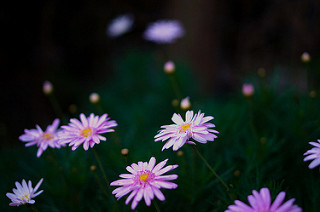

Image (CC BY 2.0) by Andrés Moreira



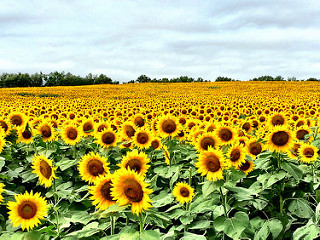

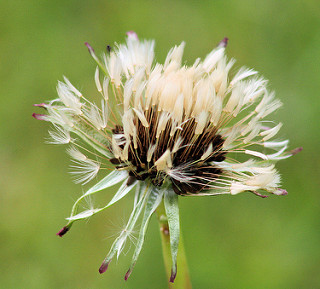

Image (CC BY 2.0) by Ben Smith

Image (CC BY 2.0) by John Haslam



In [17]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()


In [18]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

label_to_index = dict((name, index) for index, name in enumerate(label_names))

all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]


In [19]:
print("First 10 labels indices: ", all_image_labels[:10])


First 10 labels indices:  [0, 0, 1, 3, 0, 3, 2, 4, 2, 3]


In [20]:
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [21]:
type(all_image_labels)

list

In [22]:
set(all_image_labels)

{0, 1, 2, 3, 4}

In [23]:
img_path = all_image_paths[0]
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+'...')


<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [24]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)


(240, 170, 3)
<dtype: 'uint8'>


In [25]:
img_final = tf.image.resize(img_tensor,[192,192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())



(192, 192, 3)
0.0
0.97778785


In [26]:
all_image_paths

['/Users/ma/.keras/datasets/flower_photos/daisy/5796562389_ae43c83317_m.jpg',
 '/Users/ma/.keras/datasets/flower_photos/daisy/16020253176_60f2a6a5ca_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/dandelion/19617501581_606be5f716_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/5896354497_6a19162741.jpg',
 '/Users/ma/.keras/datasets/flower_photos/daisy/8127252886_96558c23d1.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/19697910486_0086d893a2.jpg',
 '/Users/ma/.keras/datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg',
 '/Users/ma/.keras/datasets/flower_photos/tulips/133960364_d87f883c15_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflowers/14646280372_dd50be16e4_n.jpg',
 '/Users/ma/.keras/datasets/flower_photos/dandelion/4574447682_40dce530f1.jpg',
 '/Users/ma/.keras/datasets/flower_photos/roses/4765063233_f64440c20b.jpg',
 '/Users/ma/.keras/datasets/flower_photos/sunflo